###### Notes
If enough time, make visualizations for the time variables, map visualizations for location variables and try to predict "Agreement Reached"

# Importing libraries

In [508]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [509]:
low_memory = False

# Importing the datasets

In [511]:
df = pd.read_csv("C:\\Users\\gonca\\Downloads\\project_data\\train_data.csv")
data = df.copy()
data_test = pd.read_csv("C:\\Users\\gonca\\Downloads\\project_data\\test_data.csv")

C:\Users\gonca\AppData\Local\Temp\ipykernel_17604\1043620227.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\gonca\\Downloads\\project_data\\train_data.csv")


# Exploratory analysis

In [513]:
#Visualize our data and all columns
pd.set_option("display.max_columns", None)
data

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [514]:
#Checking the columns data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [515]:
#Converting all date variables to datatype64 so we can work with them
data["Accident Date"] = pd.to_datetime(data["Accident Date"], 
 format = "%Y-%m-%d", 
 errors = "coerce")

data["Assembly Date"] = pd.to_datetime(data["Assembly Date"], 
 format = "%Y-%m-%d", 
 errors = "coerce")

data["C-2 Date"] = pd.to_datetime(data["C-2 Date"], 
 format = "%Y-%m-%d", 
 errors = "coerce")

data["C-3 Date"] = pd.to_datetime(data["C-3 Date"], 
 format = "%Y-%m-%d", 
 errors = "coerce")

data["First Hearing Date"] = pd.to_datetime(data["First Hearing Date"], 
 format = "%Y-%m-%d", 
 errors = "coerce")

In [516]:
#Checking for incoherences in the dates
print((data["Accident Date"] > data["Assembly Date"]).sum()) 
print((data["Accident Date"] > data["C-2 Date"]).sum())
print((data["Accident Date"] > data["C-3 Date"]).sum())
print((data["Accident Date"] > data["First Hearing Date"]).sum())

1407
982
1289
74


There are several inconsitencies that we will have to remove in the next step

In [518]:
#Checking statistics for our numerical features (except the codes but its still usefull to see their count)
data.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982784,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574026.0,42.11,0.0,31.0,42.0,54.0,117.0,14.26
Assembly Date,593471,2021-07-19 03:25:38.260841728,2020-01-01 00:00:00,2020-10-26 00:00:00,2021-07-29 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545375.0,491.09,0.0,0.0,0.0,841.0,2828079.0,6092.92
Birth Year,544948.0,1886.77,0.0,1965.0,1977.0,1989.0,2018.0,414.64
C-2 Date,559466,2021-07-16 20:11:19.865443328,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187245,2021-07-26 21:31:28.449891840,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
Claim Identifier,593471.0,23667598.79,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0,107927137.91
First Hearing Date,150798,2022-03-19 05:07:38.218278400,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.21,1.0,1.0,2.0,4.0,73.0,2.83


In [519]:
#Checking statistics for our categorical features
data.describe(include=["O"]).T

,count,unique,top,freq
Alternative Dispute Resolution,574026,3,N,571412
Attorney/Representative,574026,2,N,392291
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505
District Name,574026,8,NYC,270779
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


We can conclude that: <br>
There are a lot of missing values in _C-3 Date_, _First Hearing Date_, _IME-4 Count_ and _OIICS Nature of Injury Description_. <br>
There are no values for _OIICS Nature of Injury Description_. <br>
_Birth Year_ has a minimum value of 0 which is obviously a missing value since no one as we know of lived for more than 122.5 years <br>
There is also another that shouldn't have 0's as their minimum such as _Average Weekly Wage_  but we will be able to detect more of these anomalies in the visualization <br>
We only have three binary variables, _Attorney/Representative_ , _COVID-19 Indicator_ and _Agreement Reached_ <br>
We have a univarite variable that is _WCB Decision_ that only has the value Not Work Related


In [521]:
#Checking the percentage of NA per variable in descending order

print((data.isna().sum() / data.shape[0] *100).sort_values(ascending=False))

OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622664
First Hearing Date                     74.590502
C-3 Date                               68.449174
Birth Year                              8.176137
Average Weekly Wage                     8.104187
Zip Code                                8.101828
WCIO Part Of Body Description           6.154808
WCIO Part Of Body Code                  6.154808
WCIO Nature of Injury Description       5.914695
WCIO Nature of Injury Code              5.914695
WCIO Cause of Injury Description        5.911831
WCIO Cause of Injury Code               5.911831
C-2 Date                                5.729850
Industry Code Description               4.954412
Industry Code                           4.954412
Accident Date                           3.898084
Gender                                  3.276487
Age at Injury                           3.276487
District Name                           3.276487
COVID-19 Indicator  

There are 4 variables with more than half of their values missing (as we already expected), and only 2 that don't have missing values <br>
The rest of our data has around 5% missing values which we will have to deal with in the next step
Also we have a lot of variables that have the exact same number of missing values which means they probably have missing values in the same rows but we will have to check

In [523]:
#Checking if the following variables have all their missing values in the same rows:
data[data["Gender"].isna()][["Gender","Age at Injury","District Name","COVID-19 Indicator","Medical Fee Region","County of Injury","Claim Injury Type","Carrier Type","Carrier Name","Attorney/Representative","Alternative Dispute Resolution","Agreement Reached","WCB Decision","Number of Dependents"]].info()
data[data["WCIO Part Of Body Code"].isna()][["WCIO Part Of Body Code","WCIO Part Of Body Description"]].info()
data[data["WCIO Nature of Injury Code"].isna()][["WCIO Nature of Injury Code","WCIO Nature of Injury Description"]].info()
data[data["WCIO Cause of Injury Code"].isna()][["WCIO Cause of Injury Code","WCIO Cause of Injury Description"]].info()
data[data["Industry Code"].isna()][["Industry Code","Industry Code Description"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 3 to 593470
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          0 non-null      object 
 1   Age at Injury                   0 non-null      float64
 2   District Name                   0 non-null      object 
 3   COVID-19 Indicator              0 non-null      object 
 4   Medical Fee Region              0 non-null      object 
 5   County of Injury                0 non-null      object 
 6   Claim Injury Type               0 non-null      object 
 7   Carrier Type                    0 non-null      object 
 8   Carrier Name                    0 non-null      object 
 9   Attorney/Representative         0 non-null      object 
 10  Alternative Dispute Resolution  0 non-null      object 
 11  Agreement Reached               0 non-null      float64
 12  WCB Decision                    0 no

All the missing values that are in variable codes are in the respective variable descriptions too, showing no inconsistencies <br>
What is interesting is that there are 14 variables that show missing values in all the same rows and they aren't dependent of each other

### Visualizing the data

###### Making visualization functions for different plots

In [527]:
def plot_bar(col, degrees = 0):
    
    column = data[col].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column.index.astype(str), y=column.values)
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.xticks(rotation=degrees)  
    plt.show()

In [528]:
def plot_hist(col, rotate = False):
    column = data[col].value_counts()
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde = True)
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    if rotate:
        plt.xticks(rotation=45)  
    plt.show()

In [529]:
def plot_box(col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.xlabel(f"{col}")
    plt.show()  

In [530]:
def plot_pie(col):
    value_counts = data[col].value_counts()
    total = value_counts.sum()
    percentages = (value_counts / total) * 100

    above_threshold = percentages[percentages >= 2]
    below_threshold = percentages[percentages < 2]

    if len(below_threshold) > 0:
        other_percentage = below_threshold.sum()
        above_threshold['Others'] = other_percentage

    plt.figure(figsize=(8, 8))
    above_threshold.plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        labels=above_threshold.index
    )
    plt.ylabel("")
    plt.xlabel(f"{col}")
    plt.legend(title="Legend", loc='upper left')  
    plt.show()


In [531]:
def plot_heatmap(numerical):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = data[numerical].corr(method = 'spearman'), annot = True, cmap = "coolwarm", fmt='.1')
    plt.show()

###### Saving the columns with numerical features, categorical features and the target

In [533]:
num_features = ['Accident Date', 'Age at Injury', 'Assembly Date',
       'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'C-3 Date',
        'First Hearing Date', 'IME-4 Count', 'Number of Dependents']

In [534]:
cat_features = ['Alternative Dispute Resolution', 'Attorney/Representative',
       'Carrier Name', 'Carrier Type','County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender','Industry Code',
       'Industry Code Description', 'Medical Fee Region','WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'Agreement Reached',
       'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision']

In [535]:
target = ["Claim Injury Type"]

###### Finally seeing plots of our data minus date variables and categorical ones with lots of variables

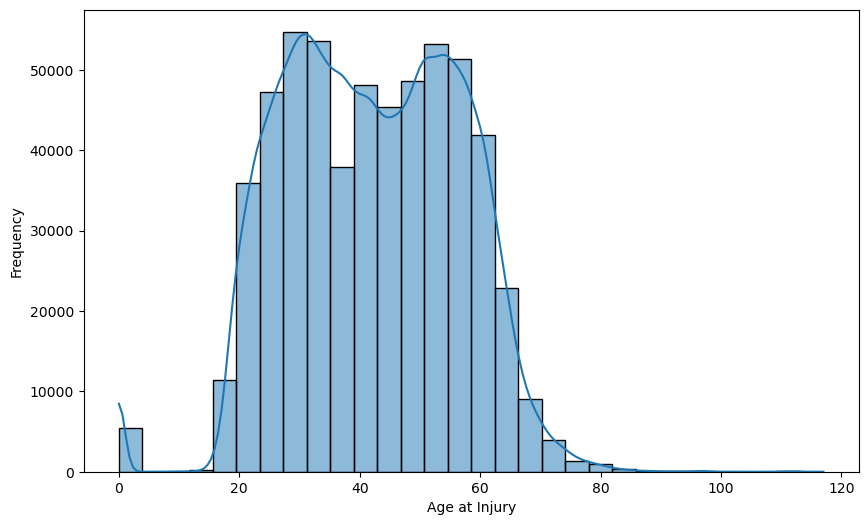

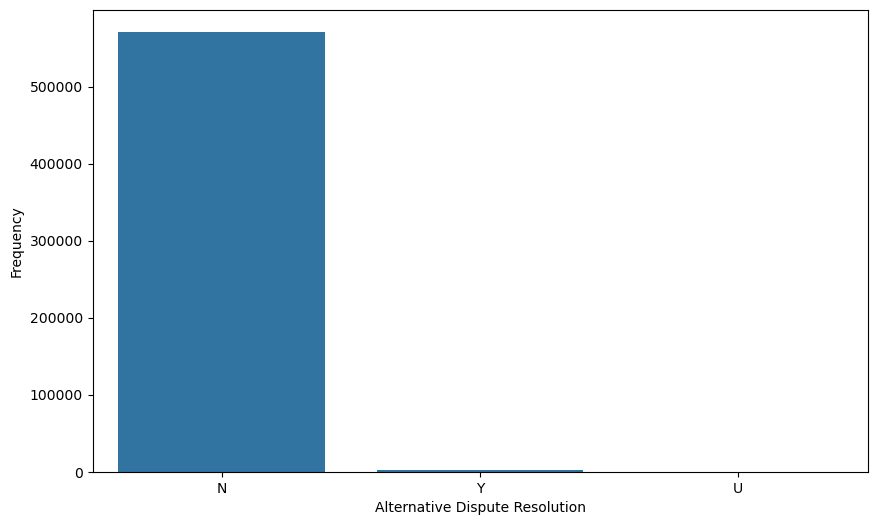

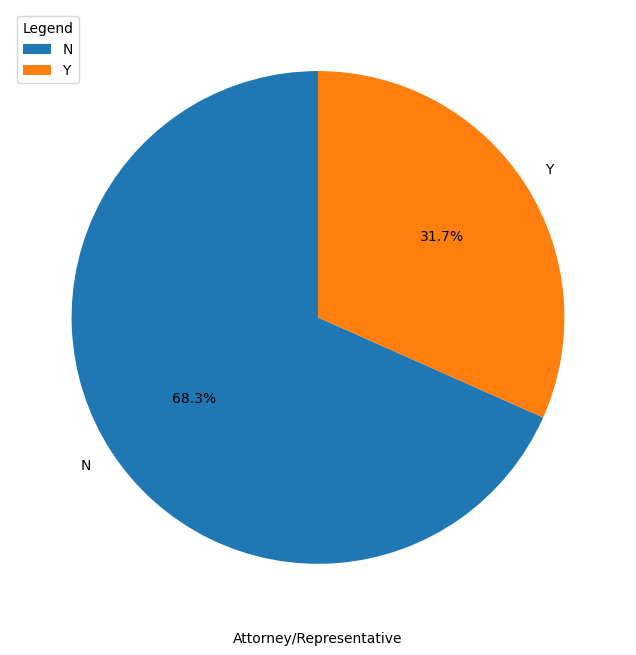

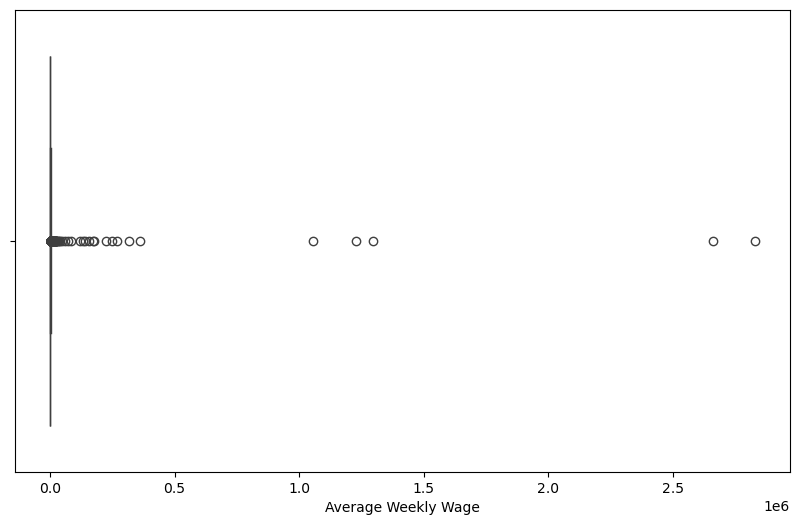

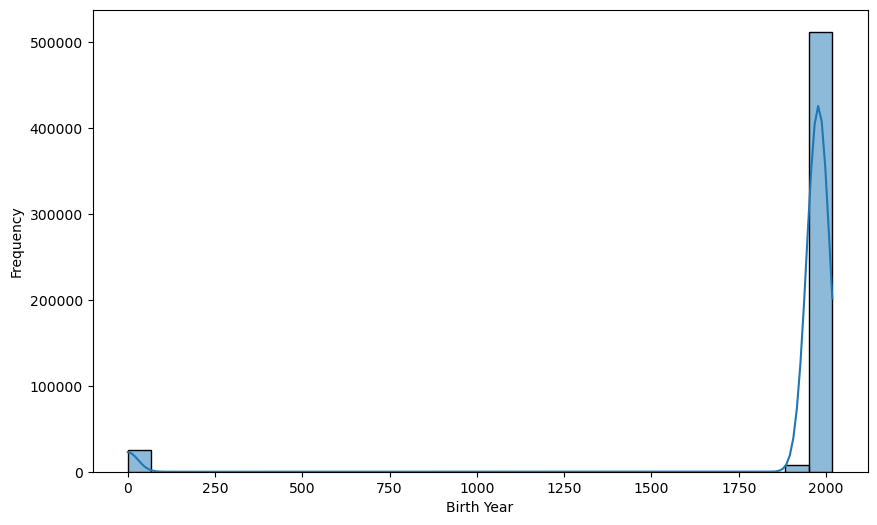

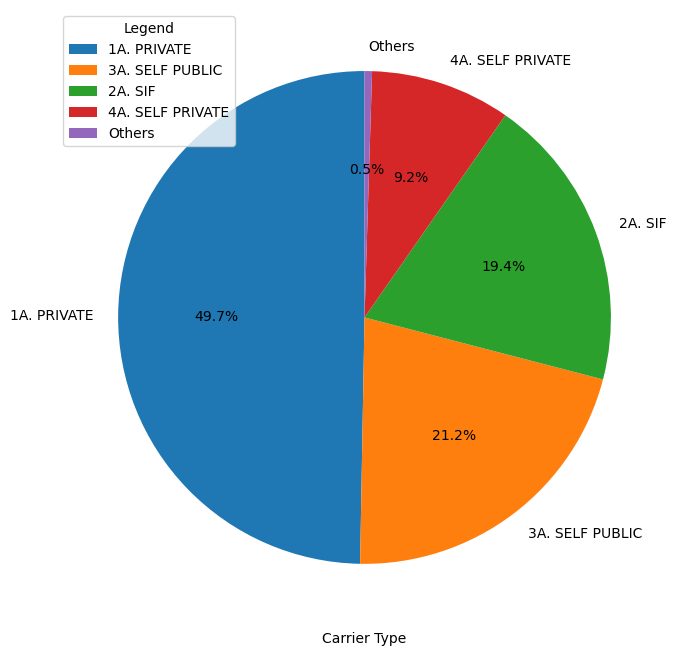

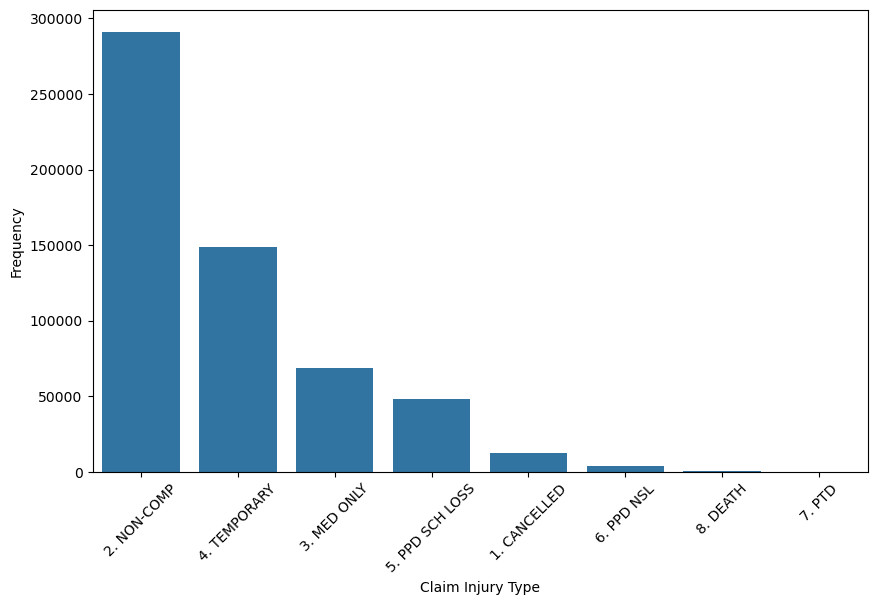

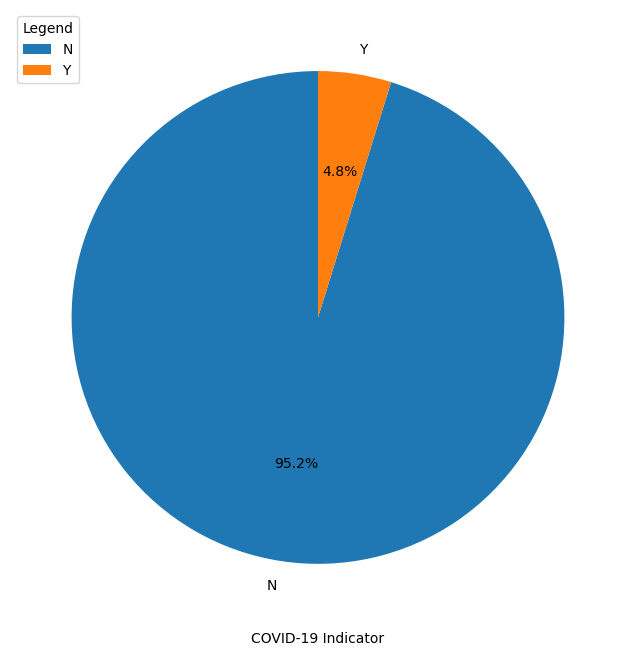

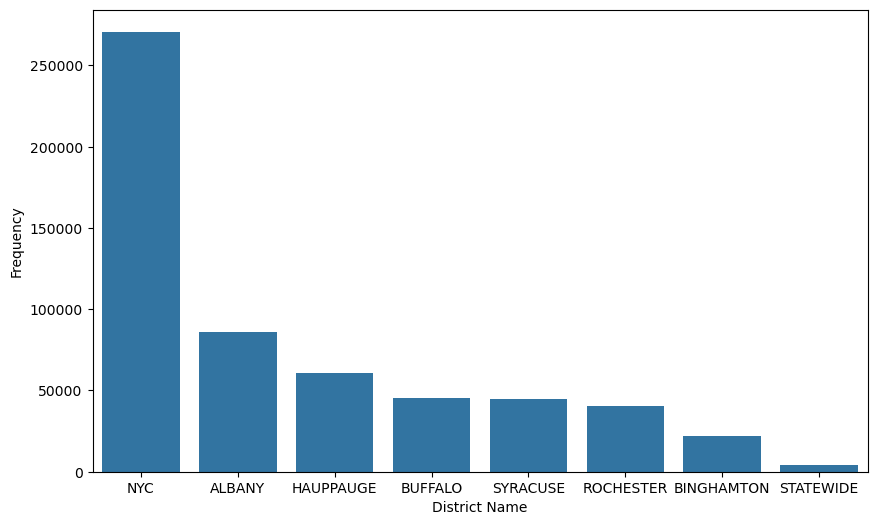

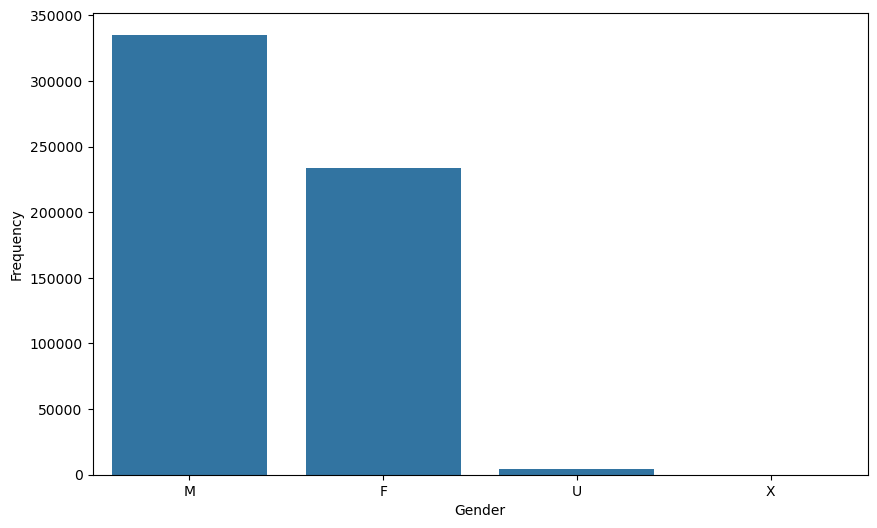

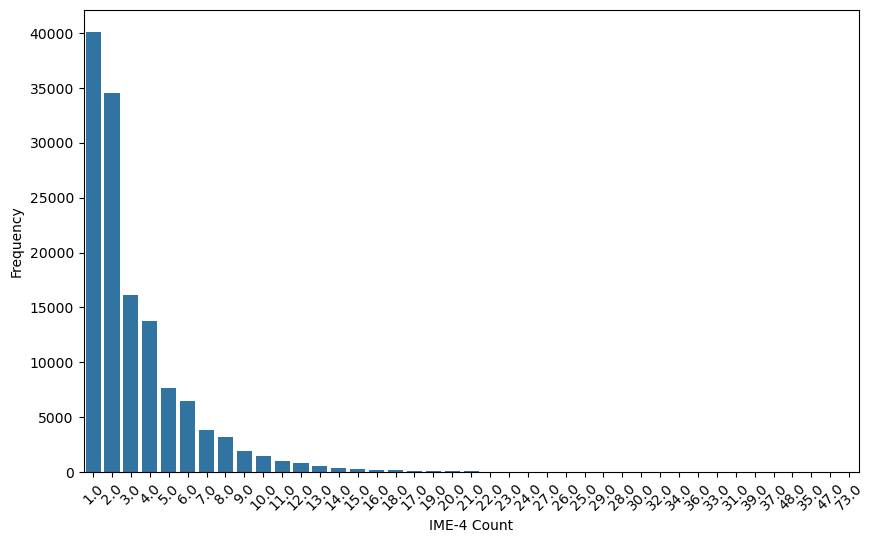

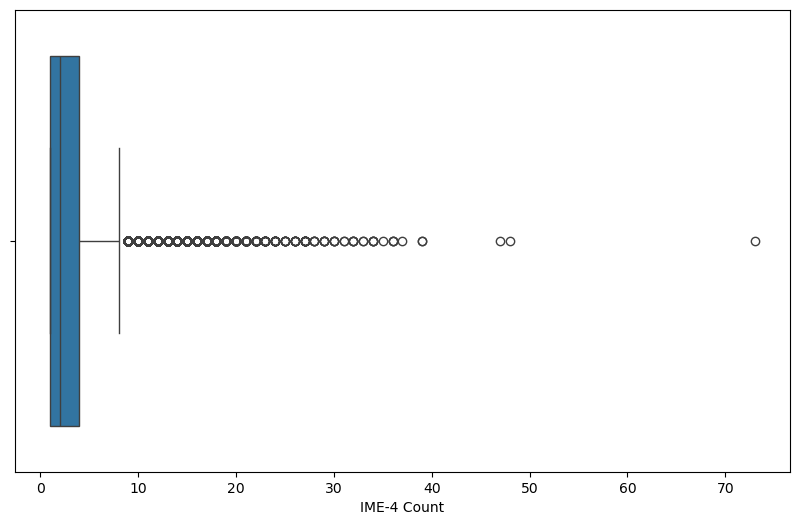

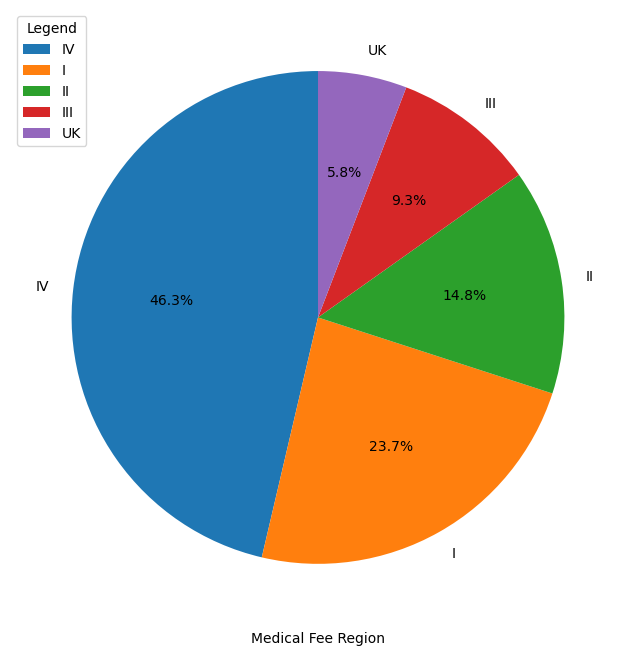

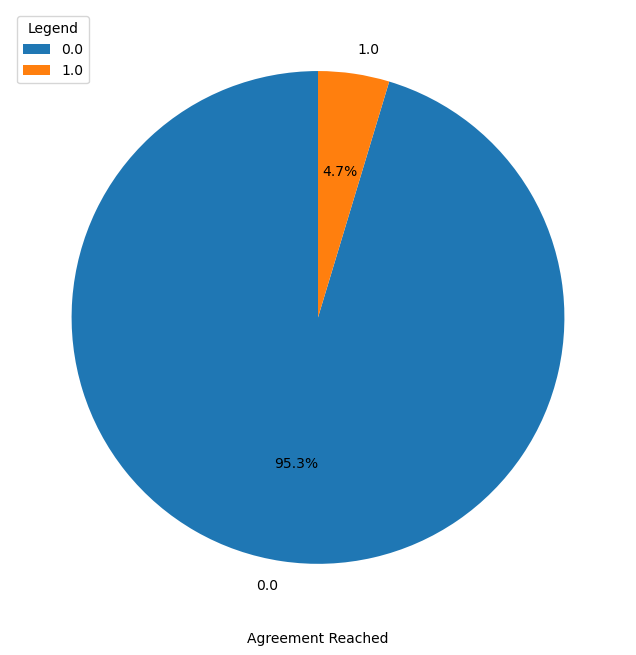

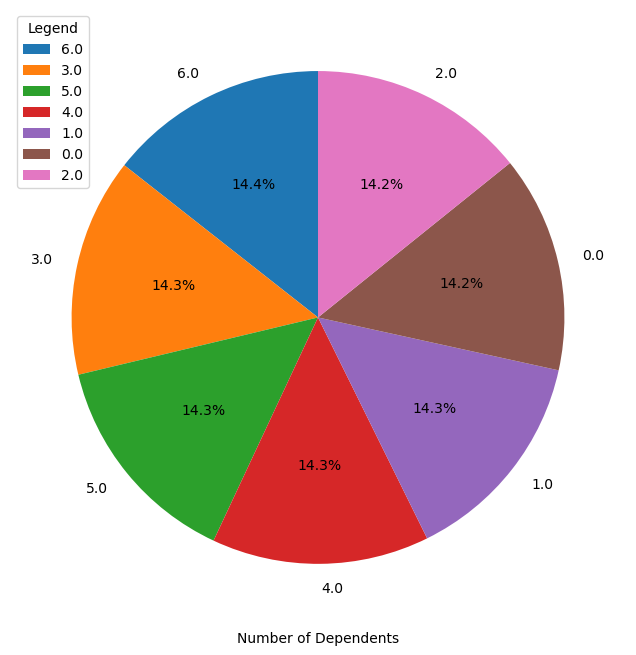

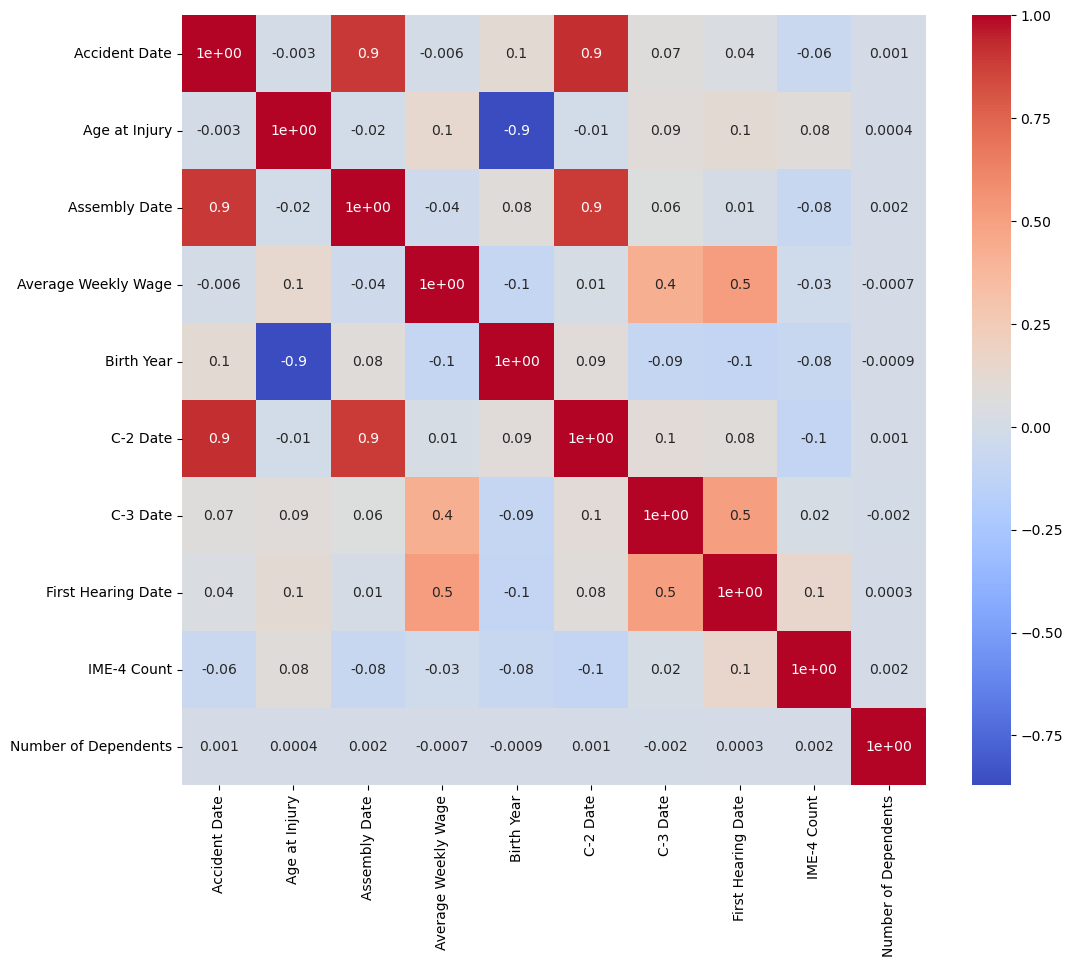

In [537]:
plot_hist("Age at Injury")
plot_bar("Alternative Dispute Resolution")
plot_pie("Attorney/Representative")
plot_box("Average Weekly Wage")
plot_hist("Birth Year")
plot_pie("Carrier Type")
plot_bar("Claim Injury Type", 45)
plot_pie("COVID-19 Indicator")
plot_bar("District Name")
plot_bar("Gender")
plot_bar("IME-4 Count", 45)
plot_box("IME-4 Count")
plot_pie("Medical Fee Region")
plot_pie("Agreement Reached")
plot_pie("Number of Dependents")
plot_heatmap(num_features)


### Conclusions
We can see in Age at _Injury_ there are a lot of 0 that are impossible but there are also a few values below 18 and above 80 that should also be impossible. <br>
Almost all values in  _Alternative Dispute Resolution_ are N and there are practically no U's (5 observations) <br>
_Average Weekly Wage_ has some very extreme outliers <br>
_Birth Year_ suffers from the same problem as Age as expected and has a lot of 0's <br>
Half of the possible values of _Carrier Type_ have very few observation and are either unkown or special funds <br>
_Gender_ has very rare categories such as U and X that only has 46 observations <br>
_IME-4_ seems to have a Half Normal Distribution and has an outlier at 73.0 <br>
_Number of Dependents_ weirdly has around the same number of variables for each amount between 0 and 6 which doesn't mimic the population <br>
The numerical variables that are highly correlated with each other are Age at Injury and Birth Year as expected, Assembly Date and Aciddent Date, Accident Date and C-2 Date, C-2 Date and Assembly date. <br>

# Data Pre-processment

In [540]:
#Defining Claim identifier as the index
data.set_index('Claim Identifier', inplace = True)

In [541]:
# Dropping variables that are definitely useless from our dataset
# The first variable has 100% missing values and the second only contains one type of value,
# meaning it doesn't provide any useful information + it isn't in the test dataset
data = data.drop(["OIICS Nature of Injury Description", "WCB Decision"], axis=1)
cat_features.remove('WCB Decision')

In [542]:
# Dropping "Agreement Reached" because it is not on the validation dataset
#Later we can try to predict this column and then predict the target but for now lets drop ot
data = data.drop(['Agreement Reached'], axis=1)
cat_features.remove("Agreement Reached")

In [543]:
# Dropping redundant variables that carry almost the same information (are extremely correlated)
# We believe it was better to keep Age at Injury than birth year since it should be more related to the injury claim type (it will be tested later)
# The same logic was applied to dropping the other two dates since we believe Accident date to be more important
data.drop(['Birth Year','Assembly Date', "C-2 Date"], axis = 1, inplace = True)
for col in ['Birth Year','Assembly Date', "C-2 Date"]:
    num_features.remove(col)

In [544]:
#Remove rows where the target variable is NaN
data.dropna(axis = 0 , subset=["Claim Injury Type"],inplace = True)

In [583]:
#Removing duplicates
data.drop_duplicates(inplace = True)

In [546]:
#changing impossible 0's to missing values
data["Average Weekly Wage"].replace(0, np.nan, inplace=True)
data["Age at Injury"].replace(0, np.nan, inplace=True)

C:\Users\gonca\AppData\Local\Temp\ipykernel_17604\1409642428.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Average Weekly Wage"].replace(0, np.nan, inplace=True)
C:\Users\gonca\AppData\Local\Temp\ipykernel_17604\1409642428.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [547]:
#convert binary variables to binary
data["Attorney/Representative"] = [val if val != val else 1 if val == "Y" else 0 for val in data["Attorney/Representative"]]
data["COVID-19 Indicator"] = [val if val != val else 1 if val == "Y" else 0 for val in data["COVID-19 Indicator"]]

### Check for inconsistencies between code columns and their description

In [549]:
# For check  any inconsistencies between codes and descriptions
def inconsistent_pairs(data, code, descripion):
    duplos = data.groupby(code)[descripion].nunique()

    inconsistent_codes = duplos[duplos > 1].index
    inconsistent_rows = data[data[code].isin(inconsistent_codes)]

    return inconsistent_rows

In [550]:
# Chamar a função para cada par de colunas
print(inconsistent_pairs(data, 'Industry Code', 'Industry Code Description'))
print(inconsistent_pairs(data, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description'))
print(inconsistent_pairs(data, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description'))
print(inconsistent_pairs(data, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description'))

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Attorney/Representative, Average Weekly Wage, C-3 Date, Carrier Name, Carrier Type, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Number of Dependents]
Index: []
Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Attorney/Representative, Average Weekly Wage, C-3 Date, Carrier Name, Carrier Type, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Co

In [551]:
#Since the codes always seem to provide the same or more information than the descriptions (have more categories),
#and the codes are consistent (always only having 1 description for code, while descriptions may have multiple codes)
#we will drop the description columns.
data.drop(['Industry Code Description','WCIO Cause of Injury Description','WCIO Nature of Injury Description','WCIO Part Of Body Description'], axis = 1,inplace = True)
for col in ['Industry Code Description','WCIO Cause of Injury Description','WCIO Nature of Injury Description','WCIO Part Of Body Description']:
    cat_features.remove(col)

In [580]:
#Adding a binary column for the dates since it might provide useful information that would be lost when the missing values are inputed
#Missing values in dates can mean that it wasn't held yet 
date_colums = ['Accident Date', 'First Hearing Date', 'C-3 Date']

for column in date_colums:
    data[column + '_missing'] = data[column].isnull().astype(int)

### Spliting the data

In [553]:
X = data.drop(["Claim Injury Type"], axis = 1)

In [554]:
y = data["Claim Injury Type"]

In [555]:
X_train, X_validation,y_train, y_validation = train_test_split(X,y,
                                                               train_size = 0.75, 
                                                               shuffle = True, 
                                                               stratify = y)

### Removing inconsistencies

In [557]:
#Remove the rows where the age of the injury is greater than 75 or between 1 and 17
X_train = X_train[(X_train['Age at Injury'] > 75) | ((X_train["Age at Injury"] <14) & (X_train["Age at Injury"] > 0))]

In [559]:
#Remove Changed Dates 
def is_date_order_correct(row):
    
    if pd.notna(row["Accident Date"]) and pd.notna(row["C-3 Date"]):
        if row["Accident Date"] > row["C-3 Date"]:
            return False
    
    if pd.notna(row["Accident Date"]) and pd.notna(row["First Hearing Date"]):
        if row["Accident Date"] > row["First Hearing Date"]:
            return False

    return True

X_train = X_train[X_train.apply(is_date_order_correct, axis=1)]


### Missing Values

Categorical Variables

In [562]:
# Replace the missing values in the categorical variables

#We fill missing values in categorical data with missing because if it is not missing at random, it might hold predictive power
X_train[cat_features] = X_train[cat_features].fillna("Missing")
X_validation[cat_features] = X_validation[cat_features].fillna("Missing")

In [606]:
for col in cat_features:
    cat_freq_train = (X_train.groupby(col).size())
    X_train[col] = X_train[col].apply(lambda x : cat_freq_train[x])
    cat_freq_val = (X_validation.groupby(col).size())
    X_validation[col] = X_validation[col].apply(lambda x : cat_freq_val[x])

Numeric Variables

In [564]:
# Decision Tree to input numerical missing values 
def impute_with_decision_tree(data, target_column):
    # Separate our data in the missing and non missing values
    available_data = X_train[X_train[target_column].notna()]
    missing_data = X_train[X_train[target_column].isna()]

    # Make sure we have data to train or input
    if len(available_data) == 0 or len(missing_data) == 0:
        return
    
    # making sure we are using only numerical data
    available_data_numeric = available_data.select_dtypes(include=['float64', 'int64', 'datetime64[ns]']).copy()
    missing_data_numeric = missing_data.select_dtypes(include=['float64', 'int64', 'datetime64[ns]']).copy()

    # Converting date variables into integers
    available_data_numeric = available_data_numeric.apply(lambda x: x.astype('int64') // 10**9 if x.dtype == 'datetime64[ns]' else x)
    missing_data_numeric = missing_data_numeric.apply(lambda x: x.astype('int64') // 10**9 if x.dtype == 'datetime64[ns]' else x)

    # Making sure again if we still have data after filtering our previous data
    if available_data_numeric.empty or missing_data_numeric.empty:
        return

    # Separating the target column from the training ones
    X_available = available_data_numeric.drop(columns=target_column)
    y_available = available_data_numeric[target_column]

    # Training and fiting the model
    model = DecisionTreeRegressor()
    model.fit(X_available, y_available)

    # Predicting the missing variables
    X_missing = missing_data_numeric.drop(columns=target_column)
    predicted_values = model.predict(X_missing)

    # If the column we are feeling is a date variable we convert it back to its type
    if pd.api.types.is_datetime64_ns_dtype(data[target_column]):
        predicted_values = pd.to_datetime(predicted_values, unit='s')  

    # Changing themissing values to the predicted ones
    data.loc[data[target_column].isna(), target_column] = predicted_values

# Filling the missing values
for column in num_features:
    impute_with_decision_tree(X_train, column)
    impute_with_decision_tree(X_validation, column)


In [565]:
#removing zip code since it isnt really a category
cat_features.remove("Zip Code")

# Feature Selection

### Chi-squared

In [568]:
#Chi squared to check which categorical variables are irrelevant or redundant
chi2_results = []

for i in range(len(cat_features)):
    for j in range(i + 1, len(cat_features)):
        contingency_table = pd.crosstab(data[cat_features[i]], data[cat_features[j]])
        
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        
        chi2_results.append({
            'Variable 1': cat_features[i],
            'Variable 2': cat_features[j],
            'Chi2': chi2,
            'p-value': p,
            'Degrees of Freedom': dof
        })

chi2_df = pd.DataFrame(chi2_results)
chi2_df

,Variable 1,Variable 2,Chi2,p-value,Degrees of Freedom
0,Alternative Dispute Resolution,Attorney/Representative,4.035367e+02,2.361115e-88,2
1,Alternative Dispute Resolution,Carrier Name,5.328693e+05,0.000000e+00,4090
2,Alternative Dispute Resolution,Carrier Type,2.540739e+04,0.000000e+00,14
3,Alternative Dispute Resolution,County of Injury,2.470469e+03,0.000000e+00,124
4,Alternative Dispute Resolution,COVID-19 Indicator,1.198762e+02,9.315879e-27,2
...,...,...,...,...,...
73,Medical Fee Region,WCIO Nature of Injury Code,1.289958e+04,0.000000e+00,220
74,Medical Fee Region,WCIO Part Of Body Code,1.171781e+04,0.000000e+00,224
75,WCIO Cause of Injury Code,WCIO Nature of Injury Code,2.822756e+06,0.000000e+00,4180
76,WCIO Cause of Injury Code,WCIO Part Of Body Code,1.431289e+06,0.000000e+00,4256


In [610]:
for index, row in chi2_df.iterrows():
    if row['p-value'] > 0.05:
        print(f"The variables \033[1m'{row['Variable 1']}'\033[0m and \033[1m'{row['Variable 2']}'\033[0m are independent (p-value = {row['p-value']:.4f}).")

The variables 'Alternative Dispute Resolution' and 'WCIO Cause of Injury Code' are independent (p-value = 0.2847).


### RFE (repeated feature elimination) 